<h1>2. Zeitreihen und ihre Merkmale visualisieren</h1>
<h4>Session 2 (Dienstag 11:00 – 12:30)</h4>
<br>
2.1 Zeitreihen plotten, Plots anpassen <br>
2.2 Gleitende Mittel berechnen und visualisieren, Autokorrelation, partielle Autokorrelation plotten<br>
2.3 Komponenten von Zeitreihen (Trend, Saisonalität) berechnen und visualisieren

<h2>2.1 Zeitreihen plotten, Plots anpassen</h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import itertools
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

<h3> Datensatz einlesen</h3>

In [3]:
ene = pd.read_csv("ene.csv")
ene['Datum'] = pd.to_datetime(ene['Datum'])
ene.set_index('Datum', inplace=True)
ene.head()

Fossile   Wind  Solar
Datum                            
2016-01-01    37521   9771    702
2016-02-01    32023  10371   1350
2016-03-01    35256   6331   2591
2016-04-01    30078   6235   4129
2016-05-01    27404   6445   5190

<h3> Daten visualisieren </h3>

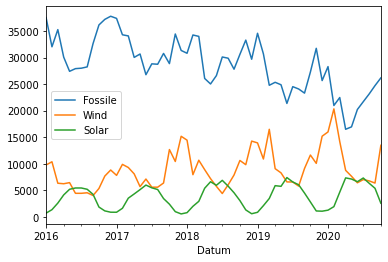

In [4]:
ene.plot();

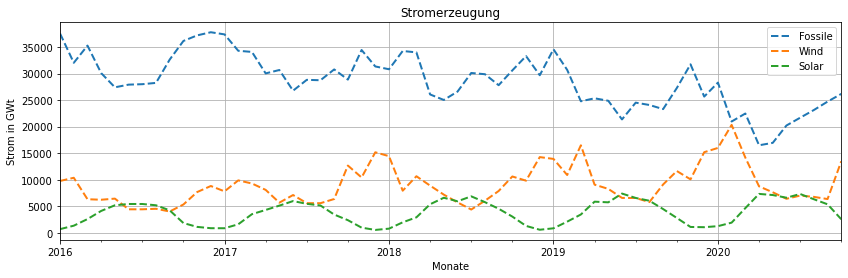

In [5]:
ene.plot(figsize=(14, 4), linewidth=2.0, linestyle='--')
plt.xlabel('Monate')
plt.ylabel('Strom in GWt')
plt.title('Stromerzeugung')
plt.grid(True)

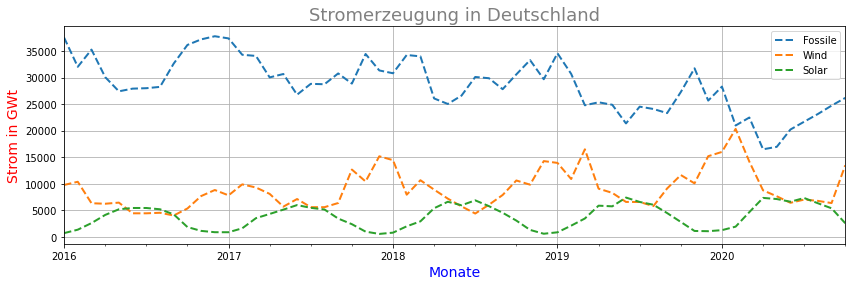

In [6]:
ene.plot(figsize=(14, 4), linewidth=2.0, linestyle='--')
x = plt.xlabel('Monate', fontsize=14, color='blue')
y = plt.ylabel('Strom in GWt', fontsize=14, color='red')
t = plt.title('Stromerzeugung in Deutschland', fontsize=18, color='grey')
plt.grid(True)

<h3>Plotly Express</h3>

In [7]:
px.line(ene, x=ene.index, y=['Fossile','Wind','Solar'])

In [8]:
px.line(ene, x=ene.index, y=['Fossile','Wind','Solar'], title='Stromerzeugung in Deutschland nach Energieträger', labels=dict(Datum="Monatliche Daten", value="Stromerzeugung in Mio. kWh", variable="Energieträger"))

In [9]:
fig = px.line(ene, x=ene.index, y=['Fossile','Wind','Solar'], title='Stromerzeugung in Deutschland nach Energieträger', labels=dict(Datum="Monatliche Daten", value="Stromerzeugung in Mio. kWh", variable="Energieträger"))
fig.update_layout(legend=dict(yanchor="top", y=0.95, xanchor="left", x=0.87))
fig.show()

<div class="alert alert-info">
- Öffne dir ein neues Notebook<br>
- Lade die Airlinedaten (Achtung - vorher natürlich Pakete laden)<br>
- Plotte die Daten zunächst mit '.plot' und passe den Plot an, dass der Leser ihn versteht<br>
- Plotte die Daten danach mit Plotly Express und passe den Plot auch entsprechend an<br>
- Wenn du extra Zeit hast, schau online nach der Plotly Express Dokumentation und probiere eine weitere Formatierungsoption daraus aus
</div>

In [10]:
airline = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)
airline.head()

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

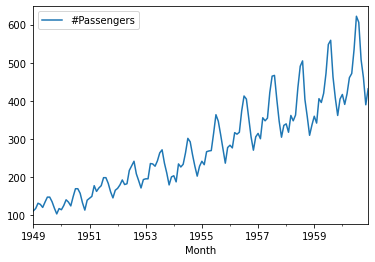

In [11]:
airline.plot();

In [13]:
fig = px.line(airline, x=airline.index, y=['#Passengers'])
fig.show()

<h2>2.2 Gleitende Mittel berechnen und visualisieren, Autokorrelation, partielle Autokorrelation plotten</h2>

<h3>Gleitende Mittel</h3>

In [9]:
emjahr = pd.read_csv("em_HH4_2012.csv", index_col=0)
emjahr['Zeit'] = pd.to_datetime(emjahr['Zeit'])
emjahr.set_index('Zeit', inplace=True)
emjahr.head()

Strom
Zeit                       
2012-01-01 00:00:00   840.0
2012-01-01 01:00:00  1102.0
2012-01-01 02:00:00  1025.0
2012-01-01 03:00:00   833.0
2012-01-01 04:00:00   733.0

<AxesSubplot:xlabel='Zeit'>

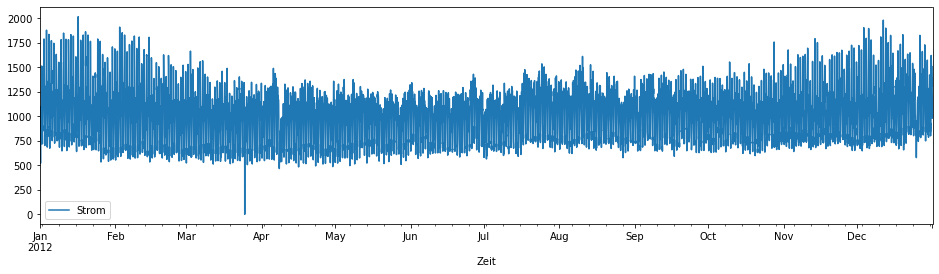

In [10]:
emjahr.plot(figsize=(16, 4))

In [11]:
rol = emjahr.rolling(24).mean()
rol

Strom
Zeit                            
2012-01-01 00:00:00          NaN
2012-01-01 01:00:00          NaN
2012-01-01 02:00:00          NaN
2012-01-01 03:00:00          NaN
2012-01-01 04:00:00          NaN
...                          ...
2012-12-31 19:00:00  1207.416667
2012-12-31 20:00:00  1198.166667
2012-12-31 21:00:00  1185.791667
2012-12-31 22:00:00  1178.041667
2012-12-31 23:00:00  1173.000000

[8784 rows x 1 columns]

<AxesSubplot:xlabel='Zeit'>

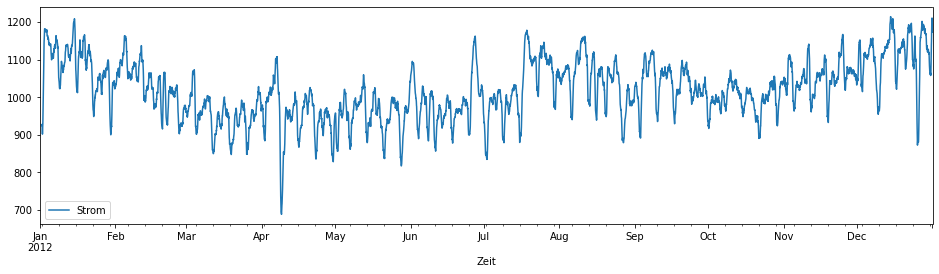

In [12]:
rol = emjahr.rolling(24).mean()
rol.plot(figsize=(16, 4))

<AxesSubplot:xlabel='Zeit'>

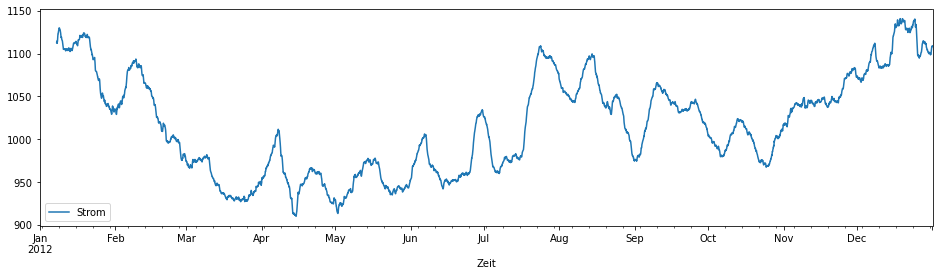

In [13]:
rol = emjahr.rolling(168).mean()
rol.plot(figsize=(16, 4))

<AxesSubplot:xlabel='Zeit'>

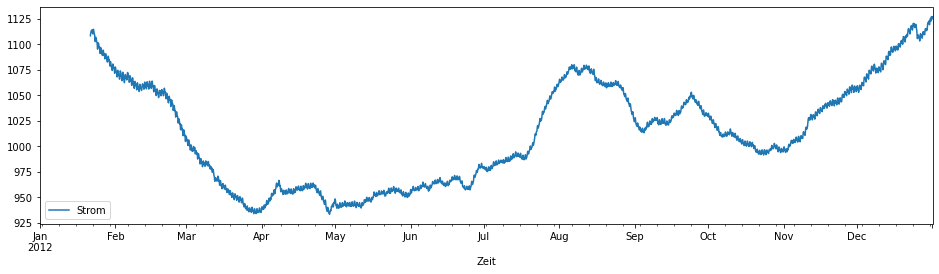

In [14]:
rol = emjahr.rolling(500).mean()
rol.plot(figsize=(16, 4))

<div class="alert alert-info">
- Öffne dir ein neues Notebook<br>
- Lade die Stromverbrauchsdaten von Haushalt 8 im Mai<br>
- Plotte die Daten<br>
- Berechne verschiedene gleitende Mittel und plotte sie
</div>

In [14]:
em = pd.read_csv("em_HH8_2012_05.csv", index_col=0)
em['Zeit'] = pd.to_datetime(em['Zeit'])
em.set_index('Zeit', inplace=True)
em.index.freq = 'H'
em.head()

Strom
Zeit                      
2012-05-01 00:00:00  834.0
2012-05-01 01:00:00  824.0
2012-05-01 02:00:00  681.0
2012-05-01 03:00:00  530.0
2012-05-01 04:00:00  672.0

In [17]:
fig = px.line(em, x=em.index, y=em.Strom)
fig.show()

<AxesSubplot:xlabel='Zeit'>

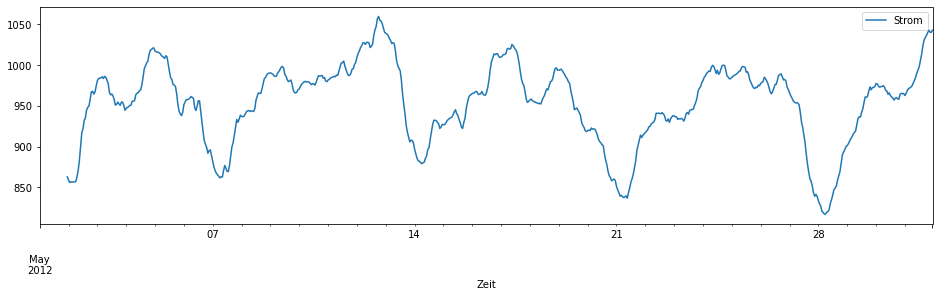

In [19]:
rol = em.rolling(24).mean()
rol.plot(figsize=(16, 4))

<AxesSubplot:xlabel='Zeit'>

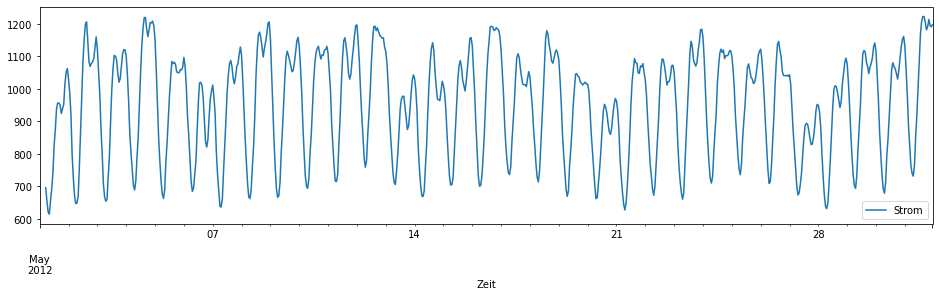

In [22]:
rol = em.rolling(6).mean()
rol.plot(figsize=(16, 4))

<h3>ACF und PACF plotten</h3>

In [15]:
solar = ene.drop(['Fossile','Wind'], axis = 1)
solar.head(12)

Solar
Datum            
2016-01-01    702
2016-02-01   1350
2016-03-01   2591
2016-04-01   4129
2016-05-01   5190
2016-06-01   5436
2016-07-01   5436
2016-08-01   5191
2016-09-01   4233
2016-10-01   1846
2016-11-01   1122
2016-12-01    875

<AxesSubplot:xlabel='Datum'>

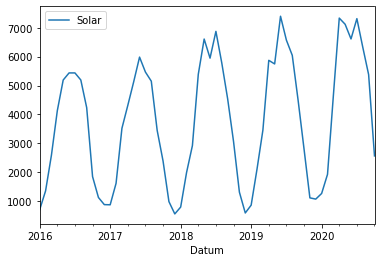

In [16]:
solar.plot()

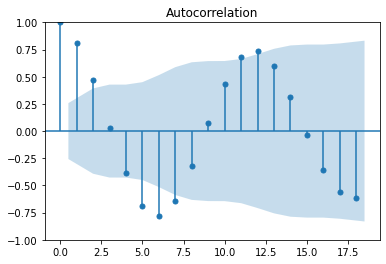

In [17]:
ACF = plot_acf(solar)

In [18]:
solar["lag_6"] = solar["Solar"].shift(6)
solar

Solar   lag_6
Datum                    
2016-01-01    702     NaN
2016-02-01   1350     NaN
2016-03-01   2591     NaN
2016-04-01   4129     NaN
2016-05-01   5190     NaN
2016-06-01   5436     NaN
2016-07-01   5436   702.0
2016-08-01   5191  1350.0
2016-09-01   4233  2591.0
2016-10-01   1846  4129.0
2016-11-01   1122  5190.0
2016-12-01    875  5436.0
2017-01-01    869  5436.0
2017-02-01   1612  5191.0
2017-03-01   3518  4233.0
2017-04-01   4312  1846.0
2017-05-01   5127  1122.0
2017-06-01   5984   875.0
2017-07-01   5466   869.0
2017-08-01   5150  1612.0
2017-09-01   3446  3518.0
2017-10-01   2385  4312.0
2017-11-01    980  5127.0
2017-12-01    553  5984.0
2018-01-01    790  5466.0
2018-02-01   1983  5150.0
2018-03-01   2920  3446.0
2018-04-01   5388  2385.0
2018-05-01   6609   980.0
2018-06-01   5948   553.0
2018-07-01   6875   790.0
2018-08-01   5780  1983.0
2018-09-01   4537  2920.0
2018-10-01   3062  5388.0
2018-11-01   1306  6609.0
2018-12-01    586  5948.0
2019-01-01    856  6875.0
2019-02-01   2107  5780.0
2019-03-01   3457  4537.0
2019-04-01   5872  3062.0
2019-05-01   5747  1306.0
2019-06-01   7399   586.0
2019-07-01   6572   856.0
2019-08-01   6045  2107.0
2019-09-01   4480  3457.0
2019-10-01   2807  5872.0
2019-11-01   1109  5747.0
2019-12-01   1066  7399.0
2020-01-01   1261  6572.0
2020-02-01   1923  6045.0
2020-03-01   4657  4480.0
2020-04-01   7335  2807.0
2020-05-01   7121  1109.0
2020-06-01   6613  1066.0
2020-07-01   7316  1261.0
2020-08-01   6330  1923.0
2020-09-01   5378  4657.0
2020-10-01   2561  7335.0

Autokorrelationsfunktion zu Lag 6<br>
y = a_6 * x_6<br>
Bestimme Gewicht a_6<br>

Partielle Autokorrelationsfunktion zu lag 6<br>
y = a_1 * x_1 + a_2 * x_2 + ... + a_6 * x_6<br>
Bestimme Gewicht a_6<br>

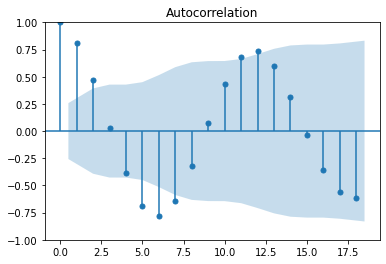

In [21]:
ACF = plot_acf(solar["Solar"])

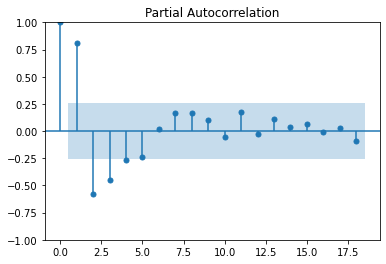

In [20]:
PACF = plot_pacf(solar["Solar"])

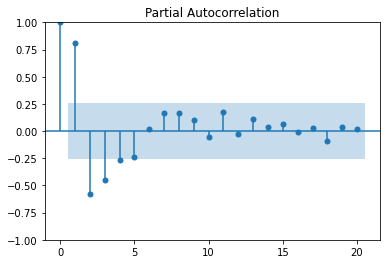

In [22]:
PACF = plot_pacf(solar["Solar"], method='ywm', lags=20)

<div class="alert alert-info">
- Gehe zurück in dein neues Notebook<br>
- Plotte die ACF deiner geladenen Stromverbrauchsdaten<br>
- Plotte auch die PACF
</div>

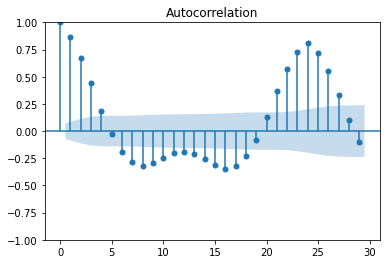

In [27]:
ACF = plot_acf(em["Strom"])

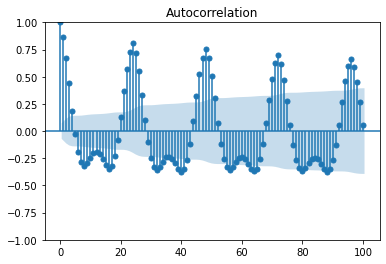

In [34]:
ACF = plot_acf(em["Strom"], lags=100)

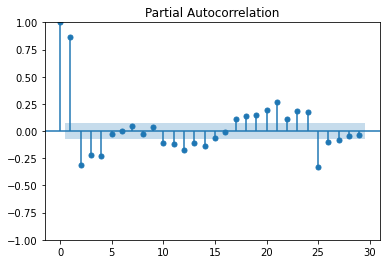

In [36]:
ACF = plot_pacf(em["Strom"])

In [53]:
emY = pd.read_csv("em_HH8_2012.csv", index_col=0)
emY.index = pd.to_datetime(emY.index)
emY.head()

Haushalt8
Zeit                          
2012-01-01 00:00:00      840.0
2012-01-01 01:00:00     1102.0
2012-01-01 02:00:00     1025.0
2012-01-01 03:00:00      833.0
2012-01-01 04:00:00      733.0

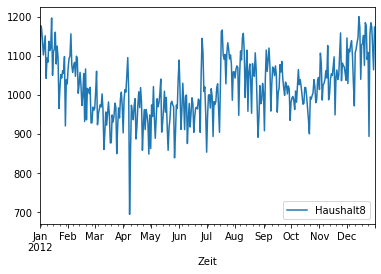

In [54]:
em_daily = emY.resample("D").mean()
em_daily.plot();

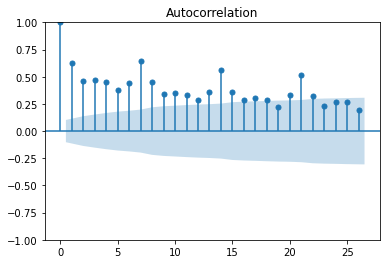

In [59]:
ACFd = plot_acf(em_daily["Haushalt8"])

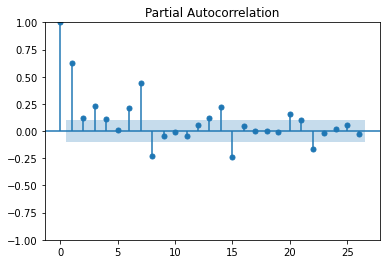

In [58]:
PACFd = plot_pacf(em_daily["Haushalt8"])

<h2>2.3 Komponenten von Zeitreihen (Trend, Saisonalität) berechnen und visualisieren</h2>

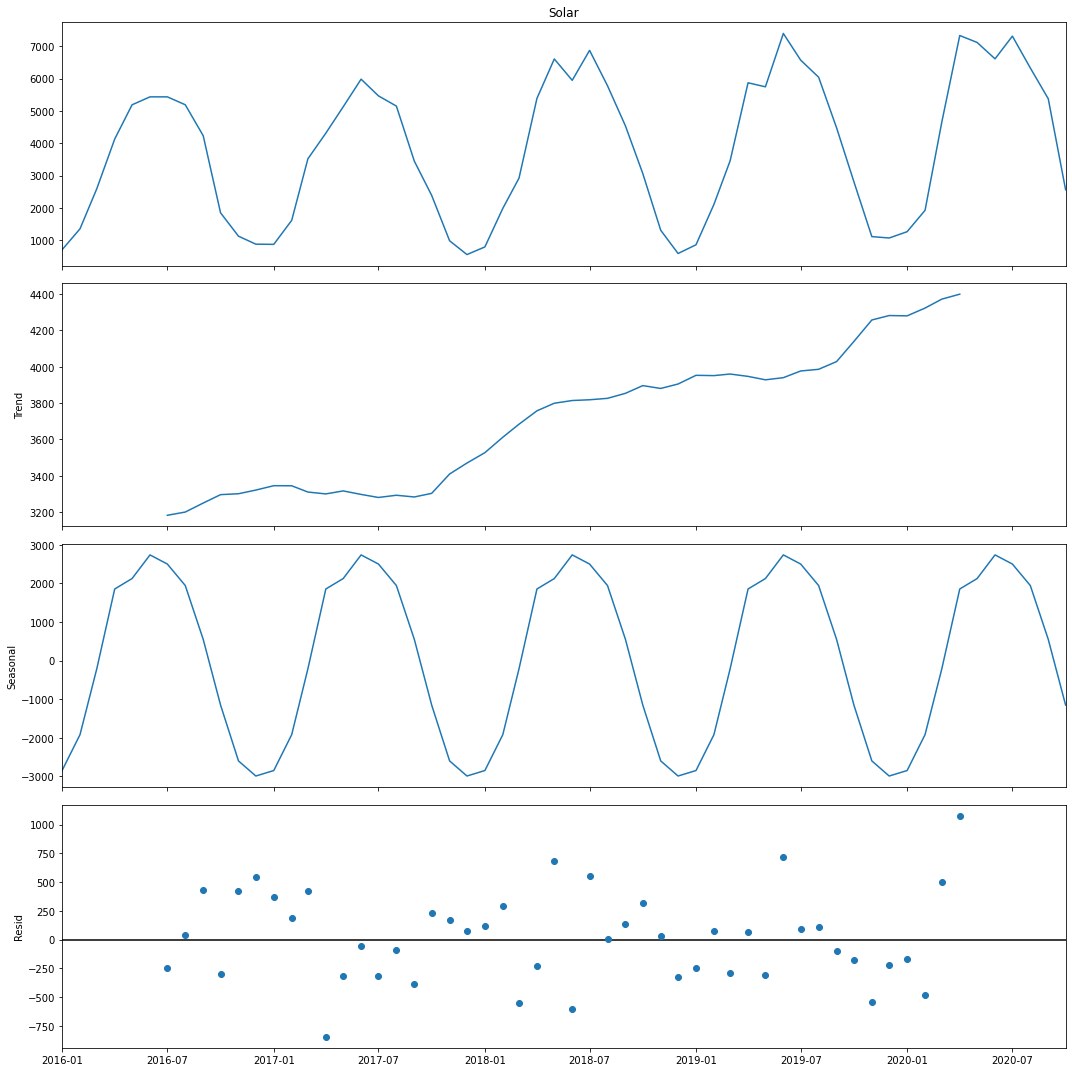

In [24]:
decomp = seasonal_decompose(ene['Solar'], model='additive')
fig = decomp.plot()
fig.set_size_inches((15, 15))
fig.tight_layout()

<div class="alert alert-info">
- Öffne ein neues Notebook (oder gehe in dein Airline-Notebook zurück wenn du nicht noch einmal Dateneinlesen üben magst<br>
- Lade die Airlinedaten<br>
- Plotte auch die Dekomposition der Daten mit 'seasonal_decompose'
</div>

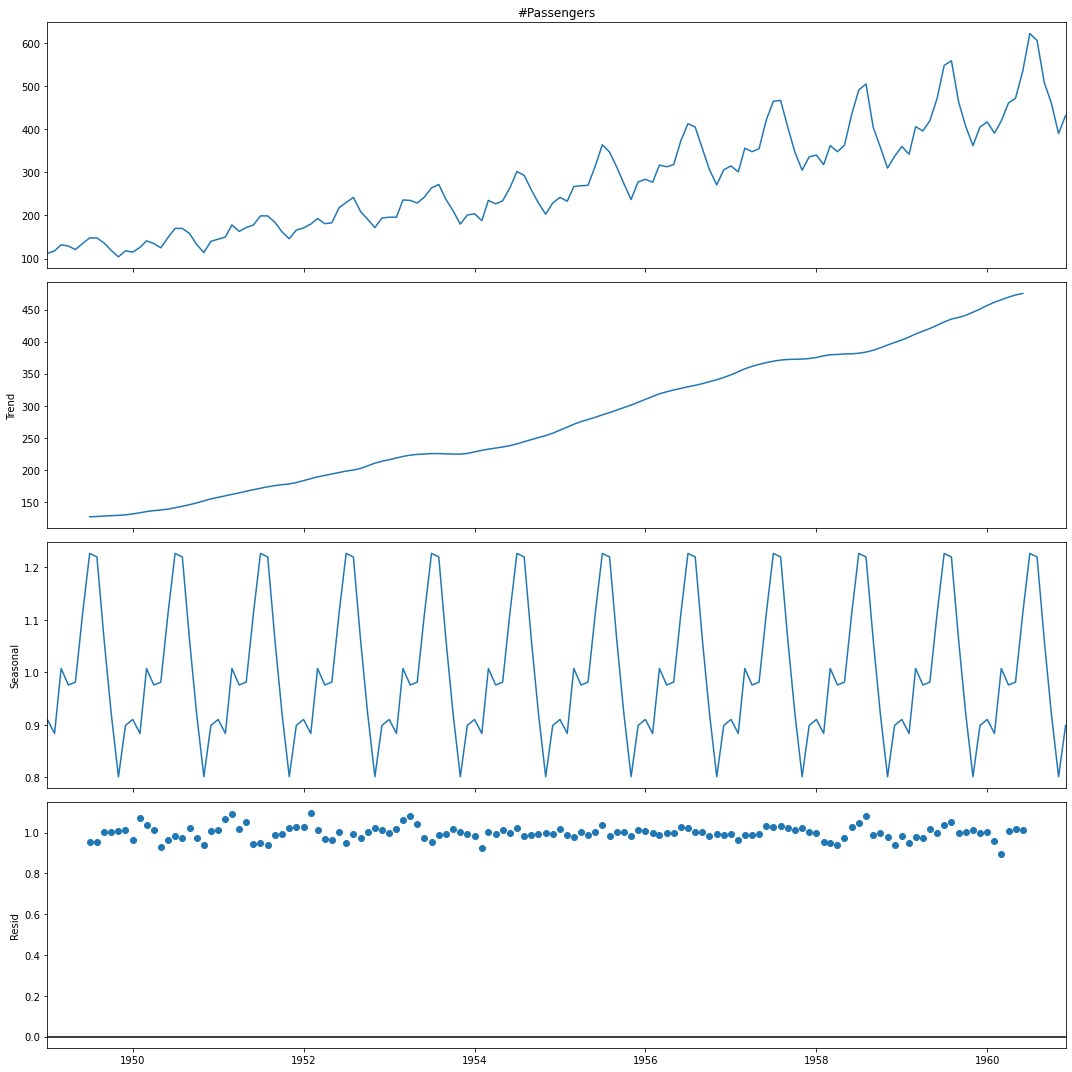

In [38]:
decomp = seasonal_decompose(airline['#Passengers'], model='multiplicative')
fig = decomp.plot()
fig.set_size_inches((15, 15))
fig.tight_layout()

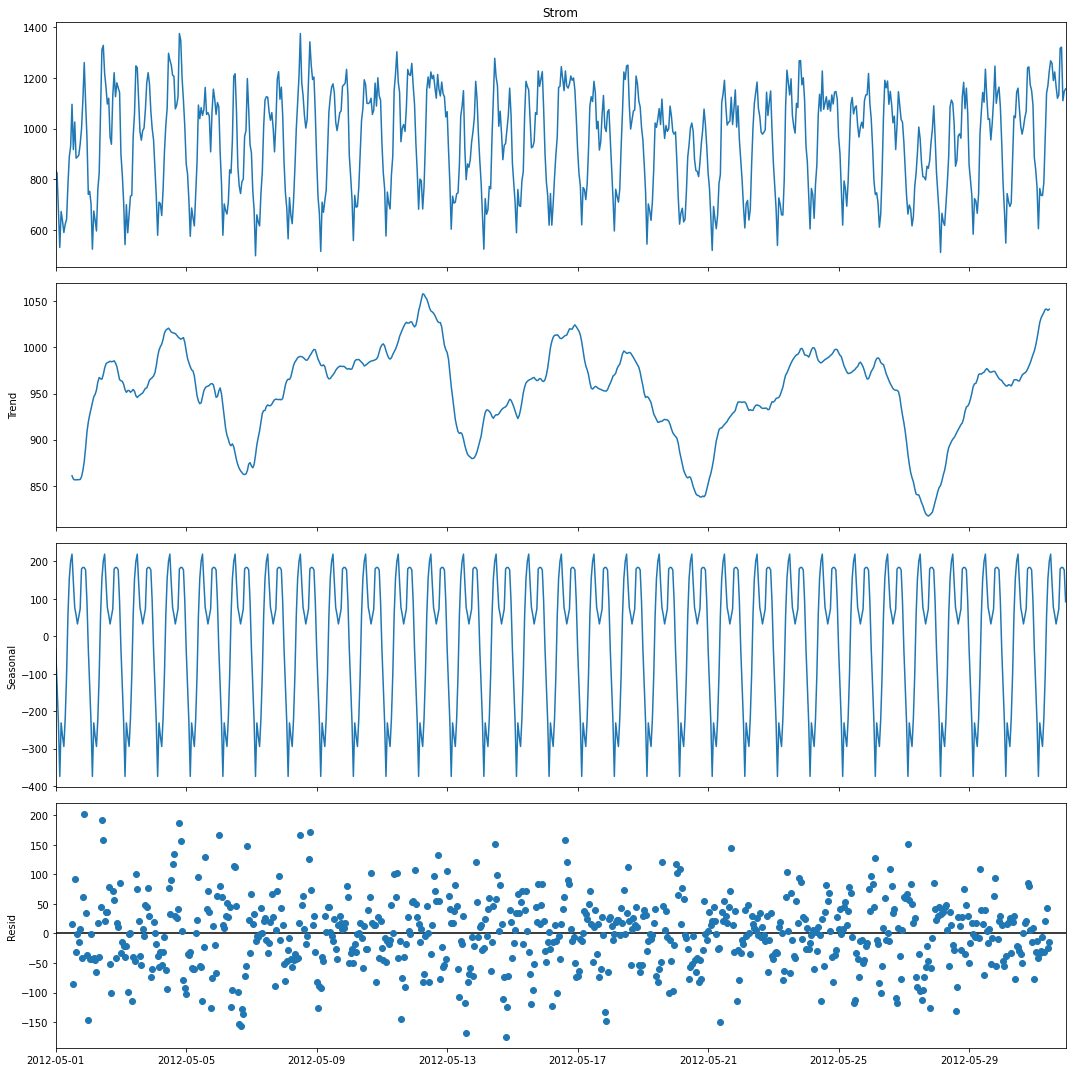

In [28]:
decomp = seasonal_decompose(em['Strom'], model='additive')
fig = decomp.plot()
fig.set_size_inches((15, 15))
fig.tight_layout()

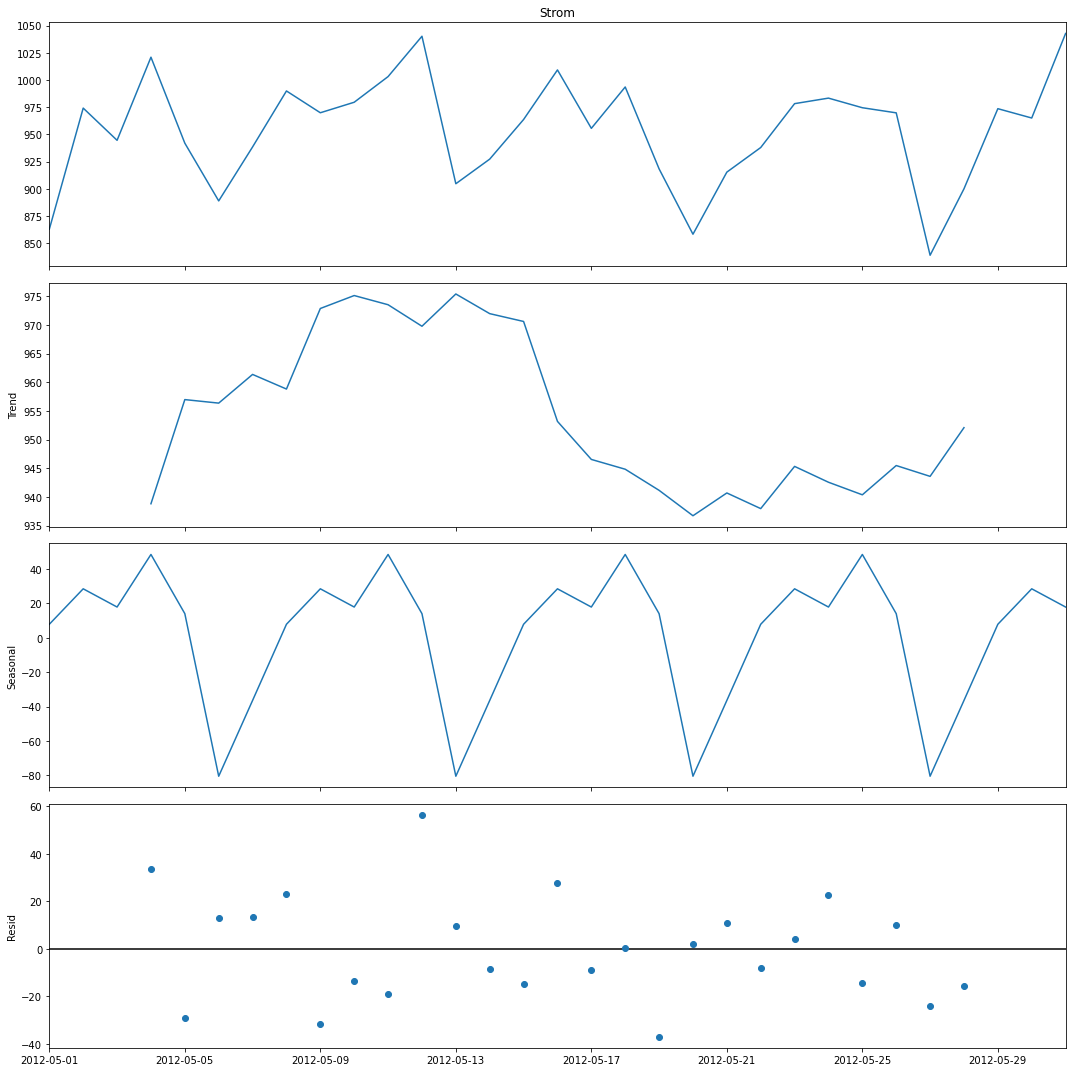

In [44]:
decomp = seasonal_decompose(em_daily['Strom'], model='additive')
fig = decomp.plot()
fig.set_size_inches((15, 15))
fig.tight_layout()